In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
td=pd.read_csv('C:/Users/diyap/Downloads/train.csv')

In [5]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#td.drop(['PassengerId','Name','Ticket'],inplace=True,axis=1)

In [8]:
#td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [14]:
table=pd.pivot_table(td, index=['Sex'])
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


<AxesSubplot:xlabel='Sex'>

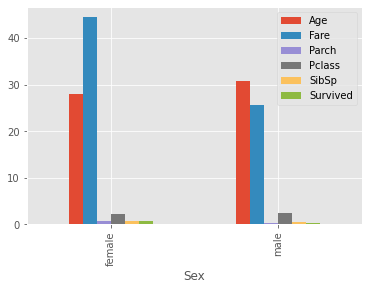

In [15]:
table.plot(kind='bar')

In [17]:
table2=pd.pivot_table(td,index=['Sex','Pclass'])
table2

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

In [19]:
table3=pd.pivot_table(td,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table3

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

<AxesSubplot:xlabel='Sex,Pclass'>

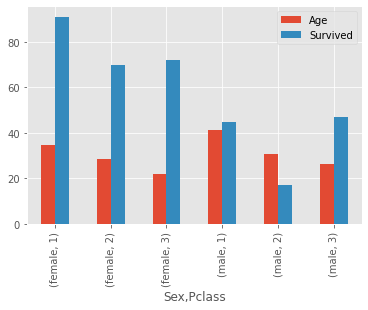

In [20]:
table3.plot(kind='bar')

In [24]:
table4=pd.pivot_table(td,index=['Sex','Pclass'],aggfunc={'Survived':np.mean})
table4

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

<AxesSubplot:xlabel='Sex,Pclass'>

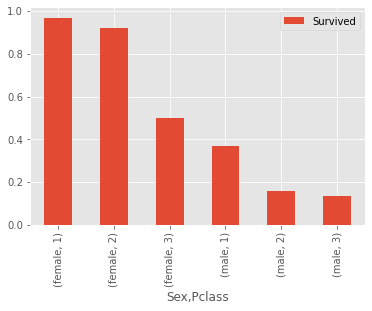

In [25]:
table4.plot(kind='bar')

In [28]:
table5=pd.pivot_table(td,index=['Sex'],columns=['Pclass'],aggfunc={'Survived':np.mean})
table5

Survived                    
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='Sex'>

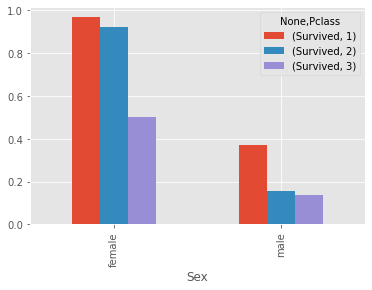

In [29]:
table5.plot(kind='bar')

In [31]:
table6=pd.pivot_table(td,index=['Sex','Pclass','Survived'],columns=['Embarked'],aggfunc={'Age':np.mean})
table6

Age                      
Embarked                        C          Q          S
Sex    Pclass Survived                                 
female 1      0         50.000000        NaN  13.500000
              1         35.675676  33.000000  33.619048
       2      0               NaN        NaN  36.000000
              1         19.142857  30.000000  29.091667
       3      0         20.700000  28.100000  23.688889
              1         11.045455  17.600000  22.548387
male   1      0         43.050000  44.000000  45.362500
              1         36.437500        NaN  36.121667
       2      0         29.500000  57.000000  33.414474
              1          1.000000        NaN  17.095000
       3      0         27.555556  28.076923  27.168478
              1         18.488571  29.000000  22.933333

In [32]:
table7=pd.pivot_table(td,index=['Sex','Pclass','Survived'],columns=['Embarked'],aggfunc={'Age':np.mean},fill_value=np.mean(td['Age']))
table7

Age                      
Embarked                        C          Q          S
Sex    Pclass Survived                                 
female 1      0         50.000000  29.699118  13.500000
              1         35.675676  33.000000  33.619048
       2      0         29.699118  29.699118  36.000000
              1         19.142857  30.000000  29.091667
       3      0         20.700000  28.100000  23.688889
              1         11.045455  17.600000  22.548387
male   1      0         43.050000  44.000000  45.362500
              1         36.437500  29.699118  36.121667
       2      0         29.500000  57.000000  33.414474
              1          1.000000  29.699118  17.095000
       3      0         27.555556  28.076923  27.168478
              1         18.488571  29.000000  22.933333